In [ ]:
import tensorflow as tf
num_classes=1000 # change according to your problem

kernel_init=tf.keras.initializers.RandomNormal(mean=0,stddev=0.01)
AlexNet_model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(227,227,3)),

    tf.keras.layers.Conv2D(filters=96,kernel_size=(11,11),strides=4,activation='relu',kernel_initializer=kernel_init,bias_initializer='zeros'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2,padding='valid'),

    tf.keras.layers.Conv2D(filters=256,kernel_size=(5,5),strides=1,padding='same',activation='relu',kernel_initializer=kernel_init,bias_initializer='ones'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2,padding='valid'),

    tf.keras.layers.Conv2D(filters=384,kernel_size=(3,3),strides=1,padding='same',activation='relu',kernel_initializer=kernel_init,bias_initializer='zeros'),

    tf.keras.layers.Conv2D(filters=384,kernel_size=(3,3),strides=1,padding='same',activation='relu',kernel_initializer=kernel_init,bias_initializer='ones'),

    tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=1,padding='same',activation='relu',kernel_initializer=kernel_init,bias_initializer='ones'),

    tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2,padding='valid'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(4096,activation='relu',kernel_initializer=kernel_init,bias_initializer='zeros'),
    tf.keras.layers.Dense(4096,activation='relu',kernel_initializer=kernel_init,bias_initializer='zeros'),

    tf.keras.layers.Dense(num_classes,activation='softmax',kernel_initializer=kernel_init,bias_initializer='zeros')


])

AlexNet_model.compile(loss=tf.keras.losses.CategoricalCrossentropy,
                      optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,weight_decay=0.00005,momentum=0.9),
                      metrics=['accuracy'])

# use Reduce on learning rate plateau callback in case you train from longer epochs

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
AlexNet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 384)      

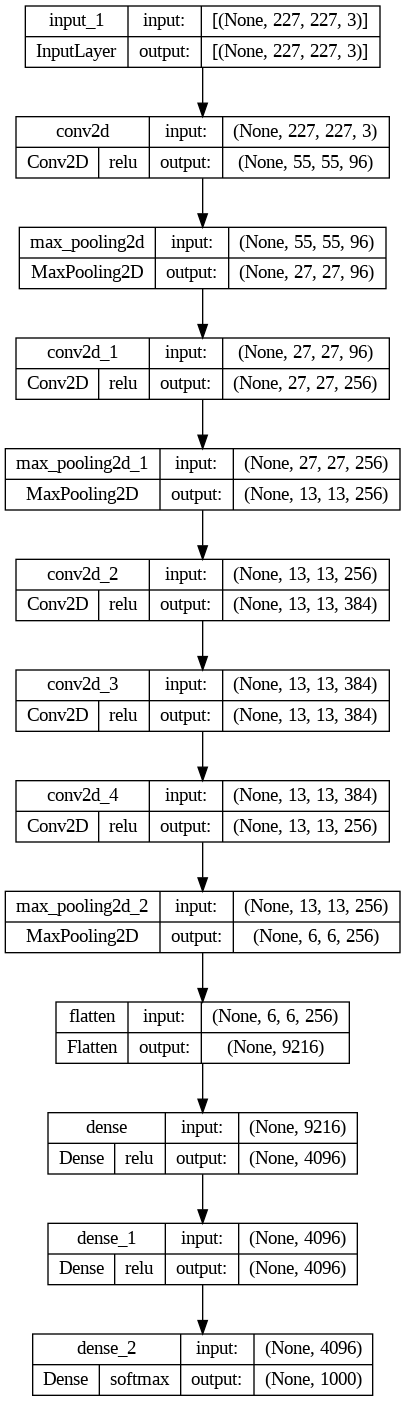

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(AlexNet_model,show_shapes=True,show_layer_activations=True,to_file='alexnet.png')